In [4]:
import matplotlib.pyplot as plt
import numpy as np

from scikit_poles_zeros._domain import Rectangle
from scikit_poles_zeros._zeros import find_zeros

plt.style.use("style.mplstyle")

In [5]:
A = -0.19435
B = 1000.41
C = 522463
T = 0.005


def f(z):
    return z**2 + A * z + B * np.exp(-T * z) + C


def f_z(z):
    return 2 * z + A - T * B * np.exp(-T * z)

In [14]:
r = Rectangle(complex(-2500, -15000), complex(10, 15000))
res = find_zeros(r, f, f_z, max_arg_principle=7)

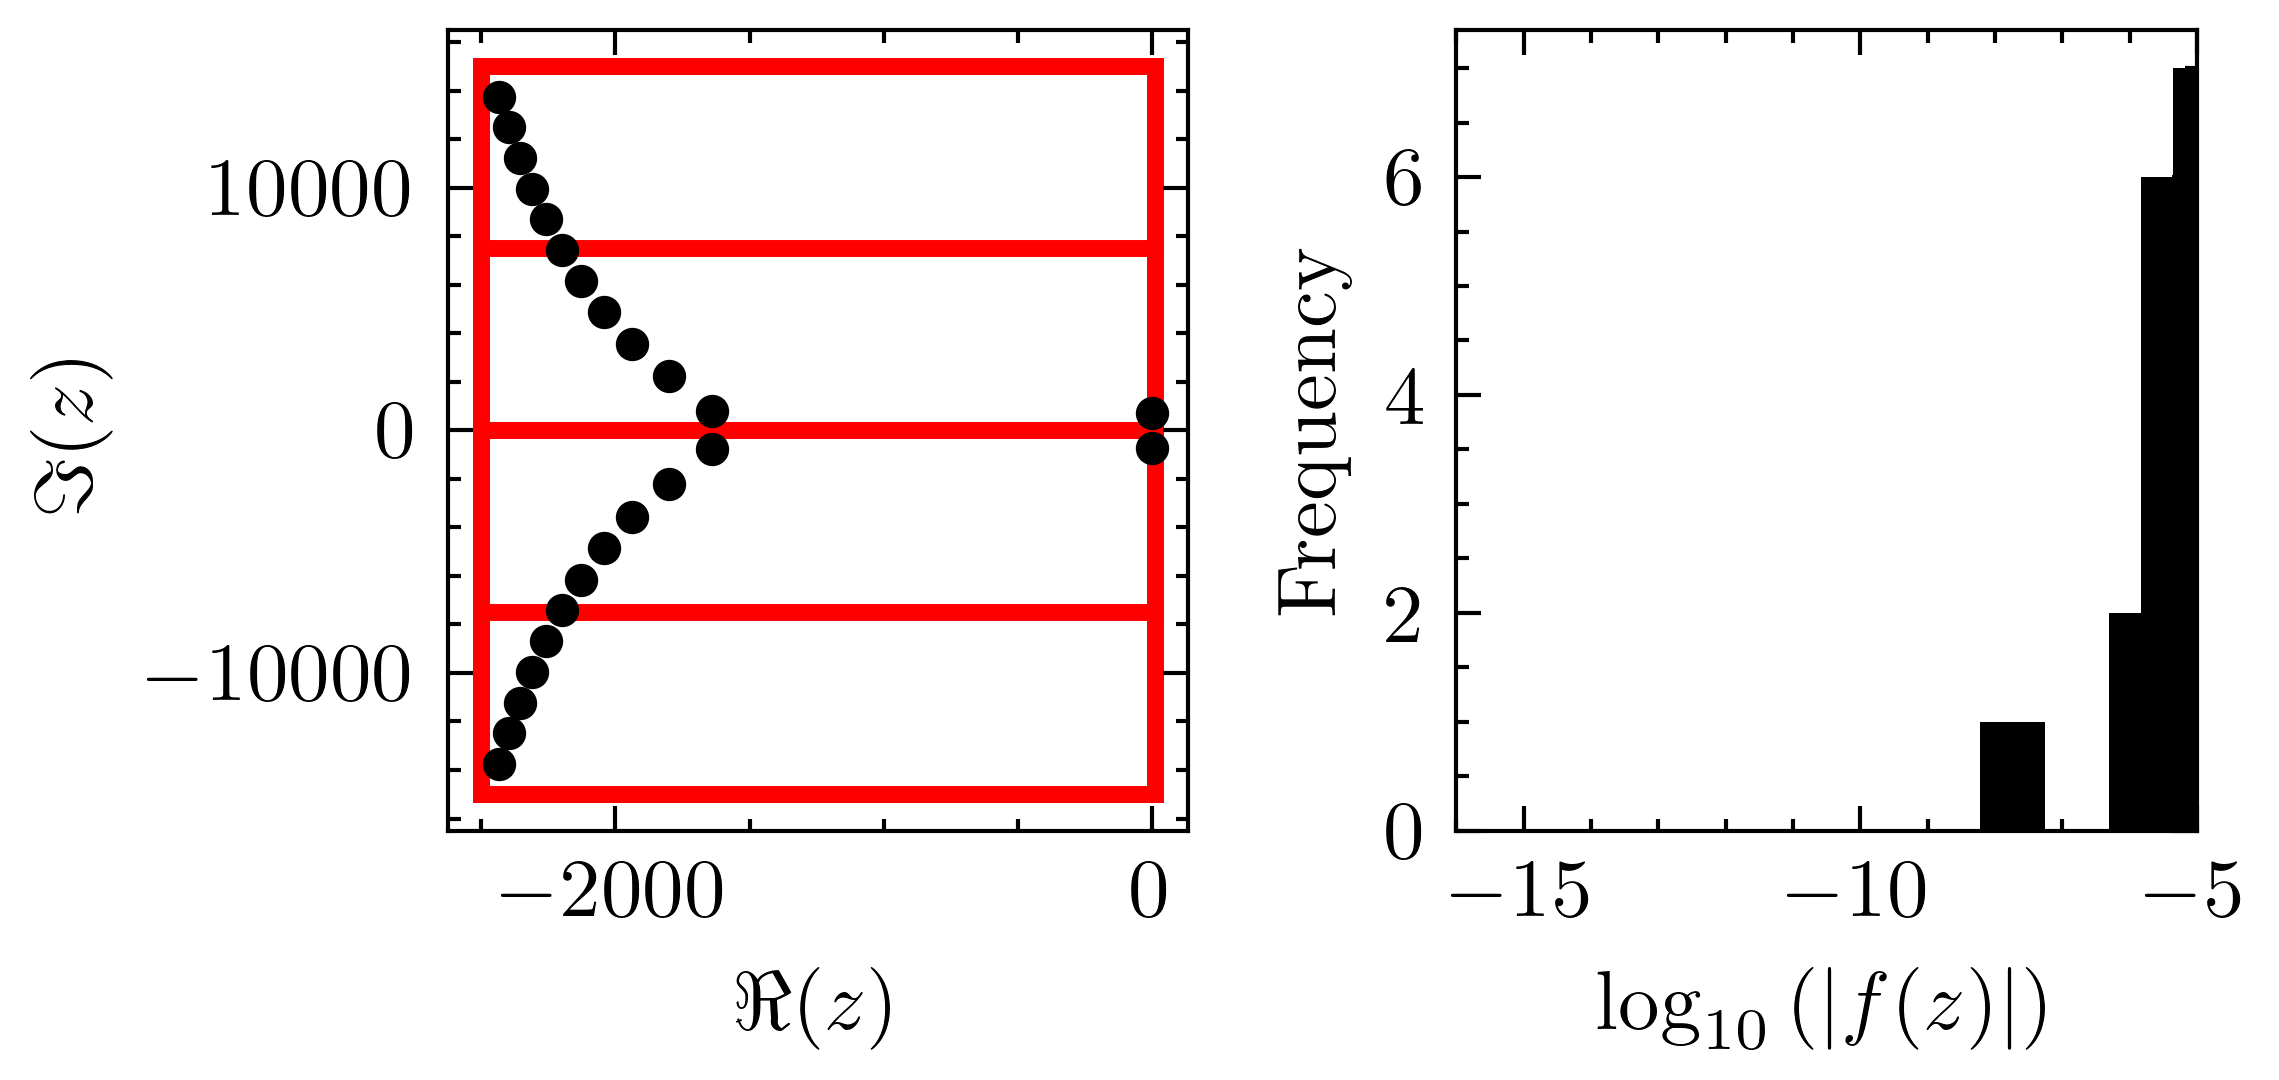

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(4, 2))
r.plot(ax1)
ax1.plot(res.zeros.real, res.zeros.imag, ".")
ax1.set_xlabel(r"$\Re(z)$")
ax1.set_ylabel(r"$\Im(z)$")
ax2.hist(np.log10(np.abs(f(res.zeros))))
ax2.set_xlim([-16, -5])
ax2.set_xlabel(r"$\log_{10}\left(|f(z)|\right)$")
ax2.set_ylabel("Frequency")
plt.tight_layout()
plt.savefig("figures/example2.pdf")